In [1]:
import psycopg2
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pytz
import pandas_ta as ta
import plotly.express as px
import plotly.graph_objects as go
import itertools
from da_controller import *
from strategies import *

controllers_path = os.path.abspath("../historic_updater")
sys.path.append(controllers_path)
from controllers import *

# READ DF
data_path = os.path.abspath("../data")
sys.path.append(data_path)
data_filepath = os.path.join(data_path, 'BTCUSDT_futures_15m.csv')
df = pd.read_csv(data_filepath)
df = format_df(df)


In [2]:
backtest(df, VOLUMEMADX_strategy, fast_EMA=5, slow_EMA=17, long_EMA=250, ADX_thresh=20, ADX_period=14, vol_sma_period=10)


np.float64(2606.837441637388)

Final funds: 2606.837441637388
Total trades: 541
Win trades: 159
Lose trades: 382
Max trade rate: 1.2875107935028298
Min trade rate: 0.9305688651359122
Max win streak: 5
Max lose streak: 19
Max drawdown: 100


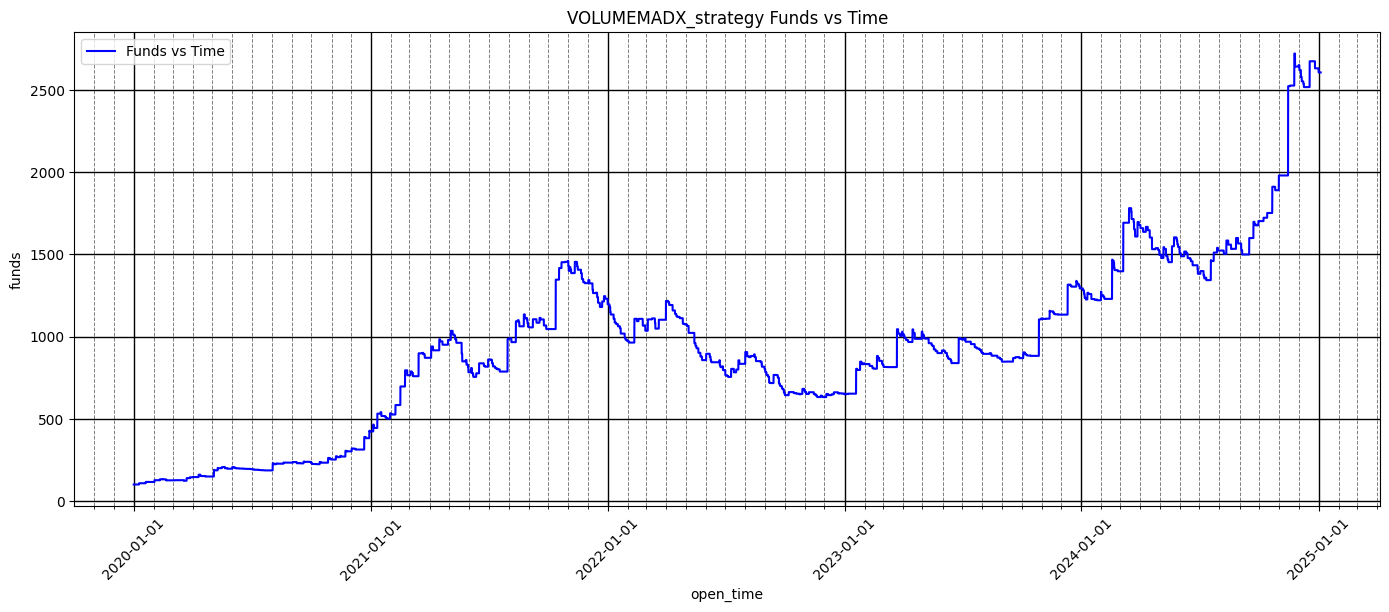

In [ ]:
detailed_backtest(df, VOLUMEMADX_strategy, fast_EMA=5, slow_EMA=17, long_EMA=250, ADX_thresh=20, ADX_period=14, vol_sma_period=10)

In [5]:
#Grid Search
fast_EMA_range = range(5, 15, 2)
slow_EMA_range = range(15, 31, 2)
long_EMA_range = range(150, 251, 25)
ADX_thresh_range = range(20, 31, 2)
ADX_period_range = range(10, 21, 2)
vol_sma_period_range = range(5, 21, 5)

# Grid Search
best_result = -np.inf
best_params = {}
total_iters = (
len(fast_EMA_range) *
len(slow_EMA_range) *
len(long_EMA_range) *
len(ADX_thresh_range) *
len(ADX_period_range) *
len(vol_sma_period_range)
)
i = 0

for fast_EMA, slow_EMA, long_EMA, ADX_thresh, ADX_period,vol_sma_period in itertools.product(
    fast_EMA_range, slow_EMA_range, long_EMA_range, ADX_thresh_range, ADX_period_range, vol_sma_period_range
):
    strategy_df = VOLUMEMADX_strategy(df, fast_EMA, slow_EMA, long_EMA, ADX_thresh, ADX_period, vol_sma_period)
    VOLUMEMADX = SpotTradeAnalyzer(strategy_df,name='VOLUMEMADX')
    if fast_EMA < slow_EMA < long_EMA:  # Aseguramos configuraciones válidas
        result = VOLUMEMADX.results['Final funds']
        
        if result > best_result:
            best_result = result
            best_params = {
                'fast_EMA': fast_EMA,
                'slow_EMA': slow_EMA,
                'long_EMA': long_EMA,
                'ADX_thresh': ADX_thresh,
                'ADX_period': ADX_period,
                'vol_sma_period': vol_sma_period
            }
    i += 1
    print(f'Iteración {i}/{total_iters}', end='\r')
print(f"Mejor configuración: {best_params}, Retorno acumulado: {best_result:.2f}")

KeyboardInterrupt: 

In [ ]:
# Genetic algorithm

